# DT


## 1. Loading the required libraries

In [2]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 2. Loading our dataset

In [13]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.savefig('ConMatrix.png', dpi=600)
    plt.show()
    return

def preprocessedData(balncesd):
    if balanced:
        getBalncedData

In [14]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
    report = [x.split('      ') for x in report.split('\n')]
    values = []
    report[6].pop(2)
    df = pd.DataFrame(report[6:9])
    return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    df2 = reportAccuracyDF(report)
    display(HTML(df.to_html(index=False,justify="center")))
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

## 3. Loading our Data

Trying the dataset

In [9]:
url = "final_data.csv"
df= pd.read_csv(url)
X = df.iloc[:, :8]  # Select columns from index 0 to 7 (variables 1-8) as the data
y = df.iloc[:, 8]  # Select column at index 8 (variable 9) as the target

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=5)

Trying the balanced dataset

In [10]:
url = "final_data_balanced.csv"
df2 = pd.read_csv(url)
XB = df2.iloc[:, :8]  # Select columns from index 0 to 7 (variables 1-8) as the data
yB = df2.iloc[:, 8]  # Select column at index 8 (variable 9) as the target

(X_trainB, X_testB,  y_trainB, y_testB) = cv.train_test_split(XB, yB, test_size=.3, random_state=5)

## 4. Comparing balanced and unbalanced

In [16]:
from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
from sklearn.metrics import confusion_matrix
# interval confidence
from statsmodels.stats.proportion import proportion_confint
# No parameters to tune

clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
#prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
#print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')
print()
print("--------------------------------------")
print()
print("Metrics of Balanced Dataset")
print()
clfB = GaussianNB()
predB = clf.fit(X_trainB, y_trainB).predict(X_testB)
confmat = sklearn.metrics.confusion_matrix(y_testB, predB)
#prettyConfusionMatrix(confmat)
#print(confusion_matrix(y_testB, predB))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_testB, predB))
report = sklearn.metrics.classification_report(y_testB, predB)
print
prettyReport(report)
#print(sklearn.metrics.classification_report(y_testB, predB))
epsilonB = sklearn.metrics.accuracy_score(y_testB, predB)
#proportion_confint(count=epsilon*X_testB.shape[0], nobs=X_testB.shape[0], alpha=0.05, method='binom_test')


Accuracy: 0.8117154811715481



TypeError: k must be an integer.

## Training and printing a decision tree

Metrics of unBalanced Dataset



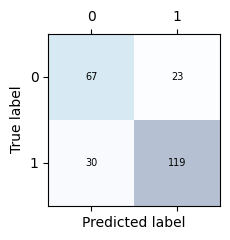


Accuracy: 0.7782426778242678



Class Name,precision,recall,f1-score,support
0,0.69,0.74,0.72,90
1,0.84,0.80,0.82,149


macro avg,0.76,0.77,239,None
weighted avg,0.78,0.78,0.78,239
,None,None,None,None


TypeError: k must be an integer.

In [17]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Metrics of unBalanced Dataset")
print()
# Obtain accuracy score of learned classifier on test data
#print(clf.score(X_test, y_test))
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
prettyReport(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print(proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
print()
print()
print("--------------------------------------")
print()
print()
print("Metrics of Balanced Dataset")
print()
clfB = tree.DecisionTreeClassifier(criterion='entropy')
clfB = clf.fit(X_trainB, y_trainB)
predB = clf.predict(X_testB)

# Obtain accuracy score of learned classifier on test data
#print(clf.score(X_testB, y_testB))
confmat = sklearn.metrics.confusion_matrix(y_testB, predB)
prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_testB, predB))
print()
prettyReport(sklearn.metrics.classification_report(y_testB, predB))
epsilon = sklearn.metrics.accuracy_score(y_testB, predB)
print(proportion_confint(count=epsilon*X_testB.shape[0], nobs=X_testB.shape[0], alpha=0.05, method='binom_test'))